<a href="https://colab.research.google.com/github/ELBrown11/predicting-compensation/blob/main/3Copy_of_Copy_of_Project2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Employee Data to Predict Base Salary**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import pandas
import pandas as pd

## **Data Background**

This data comes from [Kaggle](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries). The data, which consists of 62,000+ records and 29 columns, was scraped from [levels.fyi](http://levels.fyi). Levels is a website where employee of top companies, including MAANG (Meta, Amazon, Apple, Netflix, Google) companies, share employee data including compensation and demographic information. The data also includes several one hot encoded columns for specific levels of education and racial identities likely created by whomever scraped this data.



In [ ]:
filename = '/content/drive/MyDrive/Levels_Fyi_Salary_Data.csv'
df = pd.read_csv(filename)


print(f'Data table contains {df.shape[0]} rows and {df.shape[1]} columns')
print('\n')
df.head()

Data table contains 62642 rows and 29 columns




,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

|Column Names | Description of Data |
|:--------|:--------------------|
|timestamp| date that employee submitted data|
|company| name of company where employee works|
|level| level of seniority in position/job title|
|title| job title|
|totalyearlycompensation| total yearly earnings in usd|
|location| location of the job|
|yearsofexperience| number of years of experience employee has|
|yearsatcompany| number of years with the company|
|tag| metadata on skills|
|basesalary| yearly earnings not including stocks or bonus|
|stockgrantvalue| amount of stocks or grants earned in usd|
|bonus| amount earned via bonus in usd|
|otherdetails| contains metadata about employee|
|cityid| ?|
|dmaid| ? |
|rowNumber| row number|
|Masters_Degree| ohe* masters degree data, does this person have this degree, where 1 is yes and 0 is no|
|Bachelors_Degree| ohe* bachelors degree data, does this person have this degree, where 1 is yes and 0 is no|
|Doctorate_Degree| ohe* doctorate degree data, does this person have this degree, where 1 is yes and 0 is no|
|Highschool| ohe* high school data, does this person have this level of education, where 1 is yes and 0 is no|
|Some_College| ohe* some college data, does this person have this level of education, where 1 is yes and 0 is no|
|Race_Asian| ohe* asian race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_White| ohe* white race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Two_Or_More|ohe* two or more race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Black|ohe* black race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Hispanic|ohe* hispanic race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race| complete list of race data|
|Education| complete list of education data|

****ohe = one hot encoded***

## **Hypothesis:** years of experience, years at company, education and gender would have strong correlations with and effects on base salary.



## **Goal of this Project:** use feature data and regression modeling  to predict base salary.



## **Exploring the Contents of Data in Each Column**

In [ ]:
#contents of tag column
df.tag.value_counts()

Full Stack                        11382
Distributed Systems (Back-End)    10838
API Development (Back-End)         6277
ML / AI                            4204
Web Development (Front-End)        2971
                                  ...  
Public Policy                         1
D&I                                   1
TeleSales                             1
Serverless                            1
Industry Cloud                        1
Name: tag, Length: 3058, dtype: int64

----------------
- contains data about certain skills that the employee has
---------------

In [ ]:
#contents of otherdetails
df.otherdetails.value_counts()

Masters                                                                                                                                3983
Title: Software Engineer                                                                                                               1453
Race: Asian, Academic Level: Master’s degree                                                                                           1213
Race: White, Academic Level: Bachelor’s degree                                                                                         1075
Race: Asian, Academic Level: Bachelor’s degree                                                                                          977
                                                                                                                                       ... 
150,000 sign on, Title: Sr. Engineering Manager, Race: White, Academic Level: Doctorate (PhD)                                             1
Title: Sde2, Race: T

--------------
- contains metadata, some rows include education, title, race
- the data each row contains varies (12841 unique values)
- this row contains data that is already in other columns therefore it can be dropped

--------------



In [ ]:
df.cityid.value_counts()

11527    8701
7419     6796
10182    4562
11521    2649
7322     2275
         ... 
13149       1
7786        1
38771       1
9509        1
28230       1
Name: cityid, Length: 1045, dtype: int64

In [ ]:
df.dmaid.value_counts()

807.0    20400
819.0    12343
0.0       9826
501.0     5156
506.0     1773
         ...  
503.0        1
687.0        1
693.0        1
651.0        1
658.0        1
Name: dmaid, Length: 149, dtype: int64

In [ ]:
df.rowNumber.value_counts()

1        1
57263    1
57266    1
57267    1
57268    1
        ..
28494    1
28495    1
28496    1
28497    1
5424     1
Name: rowNumber, Length: 62642, dtype: int64

In [ ]:
df.gender.value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

 - incorrect value in gender column, will be imputed with mode/most frequent value in gender column

In [ ]:
#for loop that find that incorrect record then replaces it with the most frequent
#there's a break because there's only one of these values and a lot of data to loop through
for i in range(0, len(df)):
  gender_mode = df.gender.mode()[0]
  if (df['gender'][i] == 'Title: Senior Software Engineer'):
    df['gender'] = df['gender'].replace('Title: Senior Software Engineer',gender_mode)
    break

In [ ]:
#to check that the loop worked correctly
df.gender.value_counts()

Male      35703
Female     6999
Other       400
Name: gender, dtype: int64

## **Creating 2 DataFrames**

- `df` - for machine learning modeling
- `df2` - for data visualization and insight analysis, to prevent data leakage



In [ ]:
df2 = df.drop(columns=['timestamp','totalyearlycompensation','tag','stockgrantvalue', 
                       'bonus','otherdetails', 'cityid', 'dmaid','rowNumber','Masters_Degree', 
                       'Bachelors_Degree', 'Doctorate_Degree','Highschool', 'Some_College', 
                       'Race_Asian', 'Race_White','Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'])
df = df2


## **Dropping Irelevent Data**

I am specifically interested these columns...
- `company`,`level`,`title`,`location`,`yearsofexperience`,`yearsatcompany`,`basesalary`,`Race`, `Education`


`cityid`, `dmaid`,`timestamp`,`rowNumber` `otherdetails` columns don't contain info that i think will be impactful in predicting or relating to base salary

`stockgrantvalue`,`bonus`, `totalyearlycompensation` are the other columms with compensation data, there was also some overlap with in these so they're going to be removed 

the one hot encode version of `Race` and `Education` columns are dropped bc they were created from columns with a lot of missing data. This is addressed by during the cleaning and preprocessing methods on `df` and `df2`.



## **Cleaning `df2`** 

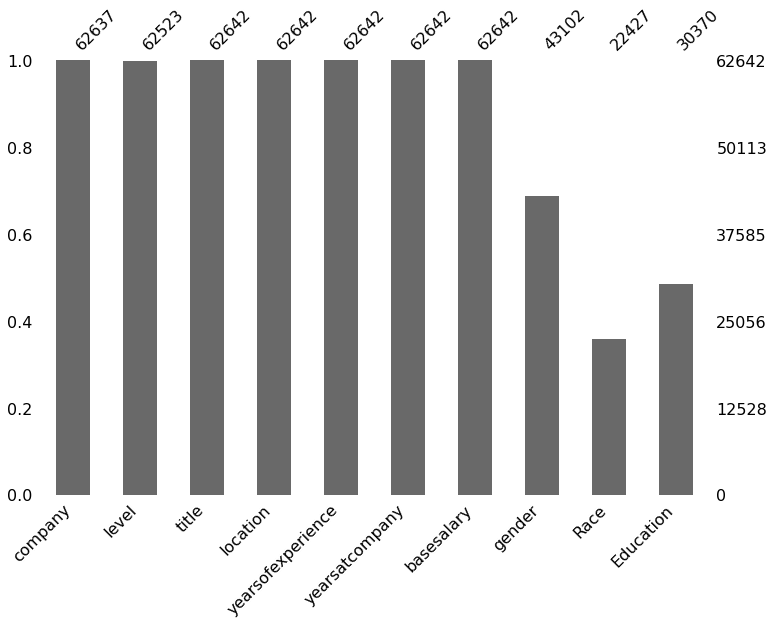

In [ ]:
#library for missing data graphics for df2
import missingno as msno
msno.bar(df2, figsize=(12,8));

> <mark>*graph gives a clear picture of which columns have missing data from df2 and how much data is missing*</mark>

------------
> ## **Missing Data**
- **5** missing in `company` column
  - can impute with mode
- **119** missing in `level` column
  - can impute with mode
- **19540** missing in `gender` column
  - can impute with mode
- **40215** missing in `Race`column
  - impute with mode and ohe
- **32272** missing in `Education` column
 - impute with mode and ohe
- technically there is missing `basesalary` column
  - there are a number of `0` values which should be imputed with mean


--------------

In [ ]:
#import machine learning libraries and methods
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


#number and category selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')



median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

#tuples for transformation
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
column_transformer = make_column_transformer(num_tuple, cat_tuple)

In [ ]:
#use column transformer impute df2 columns with missing values
columns = ['yearsofexperience','yearsatcompany','basesalary','company', 'level', 'title', 'location','gender', 'Race', 'Education']
df3 = pd.DataFrame(column_transformer.fit_transform(df2), columns=columns)


#create another dataframe where education and race are one hot encoded
df4 = pd.get_dummies(df3[['Education','Race']])

#concatonate df3 and df4 to recreate df2 that includes one hot encoded columns
df2 = pd.concat([df3,df4],
                axis=1,
                join='inner')
#change back to floats
df2.yearsofexperience = df2.yearsofexperience.astype(float)
df2.yearsatcompany = df2.yearsatcompany.astype(float)
df2.basesalary = df2.basesalary.astype(float)


In [ ]:
#imputing median basesalary,df2
for i in range(0,len(df2)):
  median_bs = df2.basesalary.median()
  if (df2['basesalary'][i] == 0):
    df2['basesalary'] = df2['basesalary'].replace(0,median_bs)

In [ ]:
#imputing median basesalary,df
for i in range(0,len(df)):
  median_bs = df.basesalary.median()
  if (df['basesalary'][i] == 0):
    df['basesalary'] = df['basesalary'].replace(0,median_bs)

In [ ]:
df2.describe()

,yearsofexperience,yearsatcompany,basesalary,Education_Bachelor's Degree,Education_Highschool,Education_Master's Degree,Education_PhD,Education_Some College,Race_Asian,Race_Black,Race_Hispanic,Race_Two Or More,Race_White
count,62642.000000,62642.000000,6.264200e+04,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,7.204135,2.702093,1.418365e+05,0.201159,0.005108,0.760879,0.027186,0.005667,0.829906,0.011015,0.018023,0.012835,0.128221
std,5.840375,3.263656,5.525289e+04,0.400870,0.071291,0.426550,0.162627,0.075067,0.375718,0.104373,0.133036,0.112562,0.334338
min,0.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.120000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2.000000,1.400000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,4.000000,1.700000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,69.000000,1.659870e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe()

,yearsofexperience,yearsatcompany,basesalary
count,62642.000000,62642.000000,6.264200e+04
mean,7.204135,2.702093,1.418365e+05
std,5.840375,3.263656,5.525289e+04
min,0.000000,0.000000,1.000000e+03
25%,3.000000,0.000000,1.120000e+05
50%,6.000000,2.000000,1.400000e+05
75%,10.000000,4.000000,1.700000e+05
max,69.000000,69.000000,1.659870e+06


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yearsofexperience            62642 non-null  float64
 1   yearsatcompany               62642 non-null  float64
 2   basesalary                   62642 non-null  float64
 3   company                      62642 non-null  object 
 4   level                        62642 non-null  object 
 5   title                        62642 non-null  object 
 6   location                     62642 non-null  object 
 7   gender                       62642 non-null  object 
 8   Race                         62642 non-null  object 
 9   Education                    62642 non-null  object 
 10  Education_Bachelor's Degree  62642 non-null  uint8  
 11  Education_Highschool         62642 non-null  uint8  
 12  Education_Master's Degree    62642 non-null  uint8  
 13  Education_PhD   

## **Duplicated Data**

> ### `df`

In [ ]:
print(f'{df.duplicated().sum()} duplicates')

2101 duplicates


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f'Now there are {df.duplicated().sum()} duplicates')

Now there are 0 duplicates


> ### `df2`

In [ ]:
print(f'{df2.duplicated().sum()} duplicates')

3304 duplicates


In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
print(f'Now there are {df2.duplicated().sum()} duplicates')

Now there are 0 duplicates


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59338 entries, 0 to 62641
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yearsofexperience            59338 non-null  float64
 1   yearsatcompany               59338 non-null  float64
 2   basesalary                   59338 non-null  float64
 3   company                      59338 non-null  object 
 4   level                        59338 non-null  object 
 5   title                        59338 non-null  object 
 6   location                     59338 non-null  object 
 7   gender                       59338 non-null  object 
 8   Race                         59338 non-null  object 
 9   Education                    59338 non-null  object 
 10  Education_Bachelor's Degree  59338 non-null  uint8  
 11  Education_Highschool         59338 non-null  uint8  
 12  Education_Master's Degree    59338 non-null  uint8  
 13  Education_PhD   

## **Exploratory Data Visualizations using `df2` Data**





In [ ]:
#import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#make visuals for targets and features
#heatmap
corr = df2.corr()
corr.style.background_gradient()


,yearsofexperience,yearsatcompany,basesalary,Education_Bachelor's Degree,Education_Highschool,Education_Master's Degree,Education_PhD,Education_Some College,Race_Asian,Race_Black,Race_Hispanic,Race_Two Or More,Race_White
yearsofexperience,1.000000,0.514572,0.421420,-0.081507,0.009402,0.073463,-0.012862,0.036527,-0.034625,-0.026078,-0.007272,-0.017464,0.055801
yearsatcompany,0.514572,1.000000,0.174722,-0.035021,-0.007646,0.034386,-0.002471,0.004421,-0.019053,-0.030845,-0.011097,-0.017095,0.041219
basesalary,0.421420,0.174722,1.000000,-0.165220,-0.016976,0.121866,0.094903,-0.000130,0.029805,-0.019798,-0.023706,-0.009273,-0.014662
Education_Bachelor's Degree,-0.081507,-0.035021,-0.165220,1.000000,-0.037602,-0.893495,-0.087011,-0.039567,-0.419920,0.101464,0.136777,0.109457,0.348013
Education_Highschool,0.009402,-0.007646,-0.016976,-0.037602,1.000000,-0.128432,-0.012507,-0.005687,-0.128208,0.013781,0.042304,0.025617,0.114038
Education_Master's Degree,0.073463,0.034386,0.121866,-0.893495,-0.128432,1.000000,-0.297189,-0.135142,0.456669,-0.102118,-0.143494,-0.113417,-0.385033
Education_PhD,-0.012862,-0.002471,0.094903,-0.087011,-0.012507,-0.297189,1.000000,-0.013161,-0.039537,-0.005822,0.006365,0.000668,0.043422
Education_Some College,0.036527,0.004421,-0.000130,-0.039567,-0.005687,-0.135142,-0.013161,1.000000,-0.139686,0.037047,0.029530,0.033048,0.122257
Race_Asian,-0.034625,-0.019053,0.029805,-0.419920,-0.128208,0.456669,-0.039537,-0.139686,1.000000,-0.231607,-0.298805,-0.250405,-0.846113
Race_Black,-0.026078,-0.030845,-0.019798,0.101464,0.013781,-0.102118,-0.005822,0.037047,-0.231607,1.000000,-0.014912,-0.012496,-0.042225


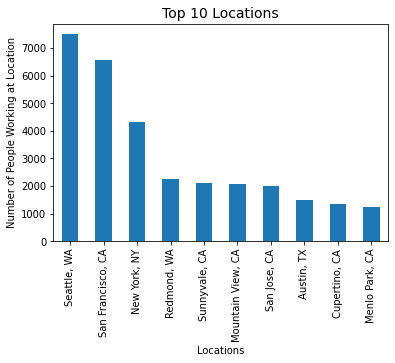

In [ ]:
df2.location.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 Locations', fontsize=14)
plt.xlabel('Locations')
plt.ylabel('Number of People Working at Location');

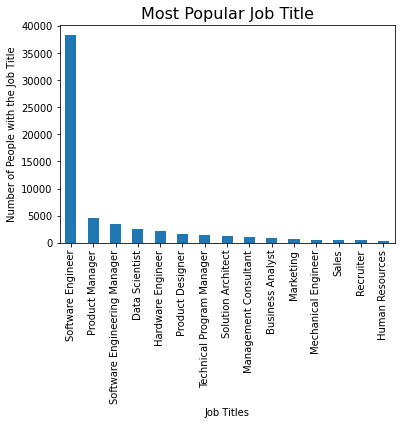

In [ ]:
df2.title.value_counts().plot(kind='bar')
plt.title('Most Popular Job Title', fontsize=16)
plt.xlabel('Job Titles')
plt.ylabel('Number of People with the Job Title');

> ### **Additional Dataframe** 
created an additional dataframe which contains data with the 25 highest base salaries

In [ ]:
#records for top 1% base salary earners
top_1per = df2.sort_values('basesalary', ascending=False)[:620]
top_1per.head()

,yearsofexperience,yearsatcompany,basesalary,company,level,title,location,gender,Race,Education,Education_Bachelor's Degree,Education_Highschool,Education_Master's Degree,Education_PhD,Education_Some College,Race_Asian,Race_Black,Race_Hispanic,Race_Two Or More,Race_White
62351,13.0,13.0,1659870.0,Microsoft,64,Product Manager,"Redmond, WA",Male,Asian,Master's Degree,0,0,1,0,0,1,0,0,0,0
61851,7.0,7.0,1620000.0,Squarespace,Senior I,Software Engineer,"New York, NY",Male,Asian,Master's Degree,0,0,1,0,0,1,0,0,0,0
45054,22.0,4.0,900000.0,PwC,Partner / Principal,Management Consultant,"Raleigh, NC",Male,Asian,Master's Degree,0,0,1,0,0,1,0,0,0,0
56175,19.0,8.0,893000.0,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",Male,White,Bachelor's Degree,1,0,0,0,0,0,0,0,0,1
57701,15.0,7.0,861000.0,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",Male,White,Bachelor's Degree,1,0,0,0,0,0,0,0,0,1


In [ ]:
top_1per.company.value_counts()

Netflix        232
Google          51
Salesforce      41
Facebook        23
Bloomberg       19
              ... 
Walmart          1
Squarespace      1
Perspecta        1
KPMG             1
Mozilla          1
Name: company, Length: 106, dtype: int64

> - companies where the top earners (via total yearly compensation) work

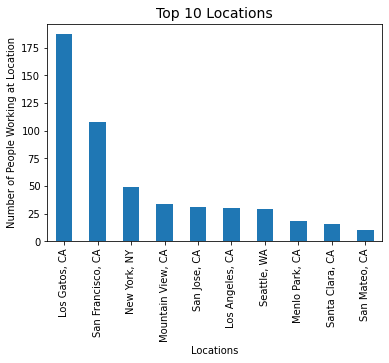

In [ ]:
top_1per.location.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 Locations', fontsize=14)
plt.xlabel('Locations')
plt.ylabel('Number of People Working at Location');

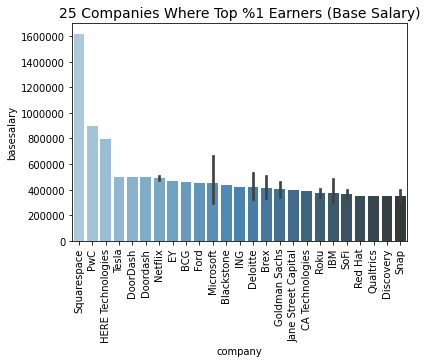

In [ ]:
companies = top_1per.groupby('company').mean().sort_values(by='basesalary', ascending=False).reset_index().company[:25]
sns.barplot(x='company', y='basesalary',data=top_1per,order=companies, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);
plt.title('25 Companies Where Top %1 Earners (Base Salary)', fontsize=14);

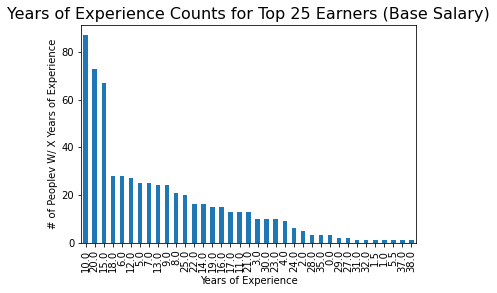

In [ ]:
top_1per.yearsofexperience.value_counts().plot(kind='bar')
plt.title('Years of Experience Counts for Top 25 Earners (Base Salary)', fontsize=16)
plt.xlabel('Years of Experience')
plt.xticks(rotation=90);
plt.ylabel('# of Peoplev W/ X Years of Experience');

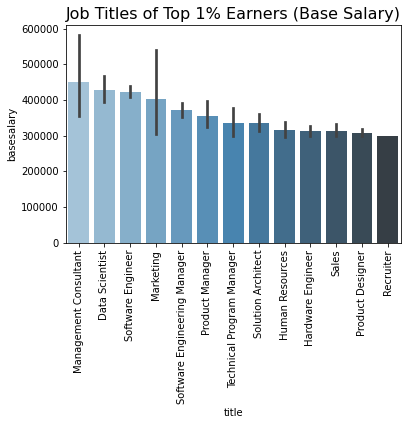

In [ ]:
titles = top_1per.groupby('title').mean().sort_values(by='basesalary', ascending=False).reset_index().title
sns.barplot(x='title', y='basesalary', data=top_1per, order=titles, palette='Blues_d')
plt.xticks(rotation=90);
plt.title('Job Titles of Top 1% Earners (Base Salary)', fontsize=16);

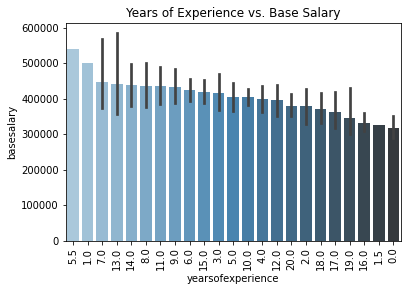

In [ ]:
years = top_1per.groupby('yearsofexperience').mean()[:20].sort_values(by='basesalary', ascending=False).reset_index().yearsofexperience

sns.barplot(x='yearsofexperience', y='basesalary',data=top_1per,order=years, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Years of Experience vs. Base Salary')
plt.xticks(rotation=90);

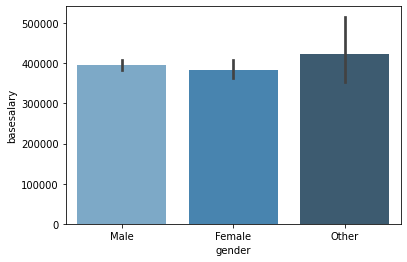

In [ ]:
gender = top_1per.groupby('gender').count().sort_values(by='basesalary', ascending=False).reset_index().gender

sns.barplot(x='gender', y='basesalary',data=top_1per,order=gender, palette='Blues_d');


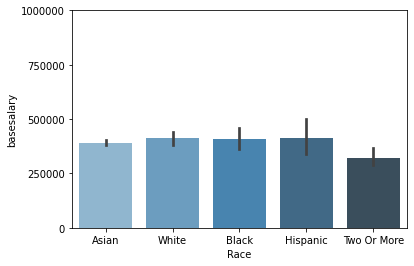

In [ ]:
race = top_1per.groupby('Race').count().sort_values(by='basesalary', ascending=False).reset_index().Race
a = sns.barplot(x='Race',y='basesalary',data=top_1per,order=race, palette='Blues_d');
plt.title('')
ticks = [0,250000,500000,750000,1000000]
a.set_yticks(ticks)
a.set_yticklabels(ticks);

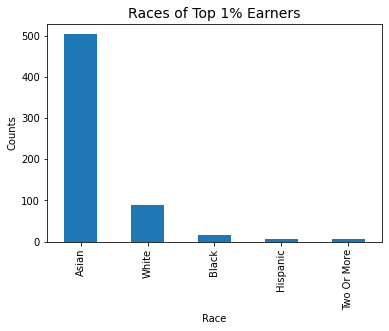

In [ ]:
top_1per.Race.value_counts().plot(kind='bar')
plt.title('Races of Top 1% Earners', fontsize=14)
plt.xlabel('Race')
plt.ylabel('Counts');

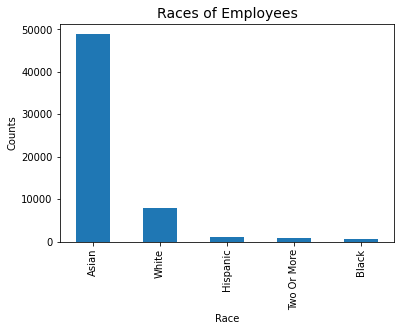

In [ ]:
df2.Race.value_counts().plot(kind='bar')
plt.title('Races of Employees', fontsize=14)
plt.xlabel('Race')
plt.ylabel('Counts');

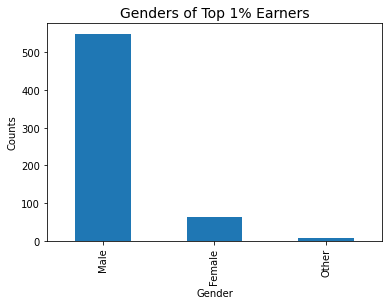

In [ ]:
top_1per.gender.value_counts().plot(kind='bar')
plt.title('Genders of Top 1% Earners', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Counts');

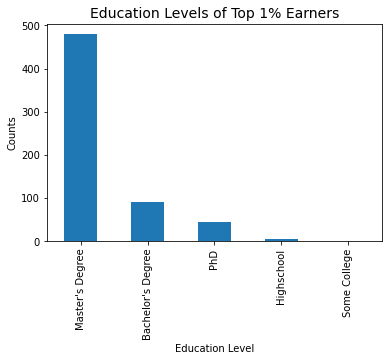

In [ ]:
top_1per.Education.value_counts().plot(kind='bar')
plt.title('Education Levels of Top 1% Earners',fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Counts');

## **Preprocessing and Modelling**

In [ ]:
#import machine learning libraries and methods
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
#assign target and features
X = df.drop(columns='basesalary')
y = df['basesalary']

In [ ]:
#create train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#instatiate the selectors for numerical and categorical
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)


numeric columns are ['yearsofexperience', 'yearsatcompany']
categorical columns are ['company', 'level', 'title', 'location', 'gender', 'Race', 'Education']


### **Preprocessing Pipelines**

In [ ]:
#instantiate imputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
#instantiate imputer with most frequent strategy
freq_imputer = SimpleImputer(strategy='most_frequent')
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#instantiate standard scaler
scaler = StandardScaler()


#match transformation to type of column
num_pipe = make_pipeline(mean_imputer, scaler)
num_tuple = (num_pipe, num_selector)
cat_pipe = make_pipeline(freq_imputer,ohe_encoder,scaler)
cat_tuple = (cat_pipe, cat_selector)



column_transformer = make_column_transformer(num_tuple,cat_tuple)


### **Linear Regression Model**

In [ ]:
#instantiate linear regression
lin_reg = LinearRegression()
#instatiate linear regression pipeline
linreg_pipe = make_pipeline(column_transformer, lin_reg)
#fit pipeline one the training data
linreg_pipe.fit(X_train, y_train)

#analysis of linear regression
linreg_score_train = r2_score(y_train, linreg_pipe.predict(X_train))
linreg_score_test = r2_score(y_test, linreg_pipe.predict(X_test))
print(f'Train R2 score (linear regression): {linreg_score_train}')
print(f'Test R2 score (linear regression): {linreg_score_test}')
print(f'Difference {linreg_score_train - linreg_score_test:.2f}')


Train R2 score (linear regression): 0.7940881004146525
Test R2 score (linear regression): -1.1733522258694946e+26
Difference 117335222586949457290461184.00


#### **More Linear Regression Model Analysis**

In [ ]:
#test and train predictions
linreg_test_preds = linreg_pipe.predict(X_test)
linreg_train_preds = linreg_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_linreg_test = mean_absolute_error(y_test,linreg_test_preds)
MAE_linreg_train = mean_absolute_error(y_train,linreg_train_preds)

#RMSE for test and train
RSME_linreg_test = np.sqrt(mean_squared_error(y_test, linreg_test_preds))
RSME_linreg_train = np.sqrt(mean_squared_error(y_train, linreg_train_preds))

print(f'Linear Regression MAE (test): {MAE_linreg_test}')
print(f'Linear Regression MAE (train): {MAE_linreg_train}')
print('\n')
print(f'Linear Regression RMSE (test): {RSME_linreg_test}')
print(f'Linear Regression RMSE (train): {RSME_linreg_train}')

Linear Regression MAE (test): 3.1424691732531744e+16
Linear Regression MAE (train): 15529.738895974513


Linear Regression RMSE (test): 5.929120872959958e+17
Linear Regression RMSE (train): 25479.030063557344


### **Random Forest Model**

In [ ]:
#import random forest library
from sklearn.ensemble import RandomForestRegressor
#instantiate random forest model
rf = RandomForestRegressor(random_state=42)
#instatiate random forest pipeline
rf_pipe = make_pipeline(column_transformer, rf)
#fit pipeline one the training data
rf_pipe.fit(X_train, y_train)

#analysis of linear regression
rf_score_train = r2_score(y_train, rf_pipe.predict(X_train))
rf_score_test = r2_score(y_test, rf_pipe.predict(X_test))
print(f'Train R2 score (random forest): {rf_score_train}')
print(f'Test R2 score (random forest): {rf_score_train}')
print(f'Difference {rf_score_train - rf_score_train:.2f}')

Train R2 score (random forest): 0.9480079464222224
Test R2 score (random forest): 0.9480079464222224
Difference 0.00


#### **More Random Forest Model Analysis**

In [ ]:
#test and train predictions
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds = rf_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_rf_test = mean_absolute_error(y_test,rf_test_preds)
MAE_rf_train = mean_absolute_error(y_train,rf_train_preds)

#RMSE for test and train
RSME_rf_test = np.sqrt(mean_squared_error(y_test, rf_test_preds))
RSME_rf_train = np.sqrt(mean_squared_error(y_train, rf_train_preds))

print(f'Random Forest MAE (test): {MAE_rf_test}')
print(f'Random Forest MAE (train): {MAE_rf_train}')
print('\n')
print(f'Random Forest RMSE (test): {RSME_rf_test}')
print(f'Random Forest RMSE (train): {RSME_rf_train}')

Random Forest MAE (test): 17893.021325865535
Random Forest MAE (train): 7206.444736764501


Random Forest RMSE (test): 28059.64440285173
Random Forest RMSE (train): 12802.967836137881


### **Decision Trees Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#insantiate decision tree
dectree = DecisionTreeRegressor(random_state=42)

#decision tree pipeline
dectree_pipe = make_pipeline(column_transformer, dectree)

#fit decision tree
dectree_pipe.fit(X_train, y_train)


#decision tree analysis
dectree_score_train = r2_score(y_train, dectree_pipe.predict(X_train))
dectree_score_test = r2_score(y_test, dectree_pipe.predict(X_test))
print(f'Train R2 score (decision tree): {dectree_score_train}')
print(f'Test R2 score (decision tree): {dectree_score_test}')
print(f'Difference {dectree_score_train - dectree_score_test:.2f}')

Train R2 score (decision tree): 0.9843905634825574
Test R2 score (decision tree): 0.5547492383883212
Difference 0.43


- shows overfitting

#### **More Decision Tree Model Analysis**

In [ ]:
#test and train predictions
dectree_test_preds = dectree_pipe.predict(X_test)
dectree_train_preds = dectree_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_dectree_test = mean_absolute_error(y_test,dectree_test_preds)
MAE_dectree_train = mean_absolute_error(y_train,dectree_train_preds)

#RMSE for test and train
RSME_dectree_test = np.sqrt(mean_squared_error(y_test, dectree_test_preds))
RSME_dectree_train = np.sqrt(mean_squared_error(y_train, dectree_train_preds))

print(f'Decision Tree MAE (test): {MAE_dectree_test}')
print(f'Decision Tree MAE (train): {MAE_dectree_train}')
print('\n')
print(f'Decision Tree RMSE (test): {RSME_dectree_test}')
print(f'Decision Tree RMSE (train): {RSME_dectree_train}')

Decision Tree MAE (test): 22134.423233387603
Decision Tree MAE (train): 1146.1623052816378


Decision Tree RMSE (test): 36524.00880765469
Decision Tree RMSE (train): 7015.1309384194765


### **Bagged Trees Model**

In [ ]:
#import bagged tree
from sklearn.ensemble import BaggingRegressor
#instantiate bagged tree
bagreg = BaggingRegressor(random_state=42)
#bagged pipeline
bagreg_pipe = make_pipeline(column_transformer, bagreg)
#fit pipeline
bagreg_pipe.fit(X_train,y_train)

bagreg_score_train = r2_score(y_train, bagreg_pipe.predict(X_train))
bagreg_score_test = r2_score(y_test, bagreg_pipe.predict(X_test))
print(f'Train R2 score (bagged trees): {bagreg_score_train}')
print(f'Test R2 score (bagged trees): {bagreg_score_test}')
print(f'Difference {bagreg_score_train - bagreg_score_test:.2f}')

Train R2 score (bagged trees): 0.9365716456611555
Test R2 score (bagged trees): 0.7236860006112527
Difference 0.21


#### **More Bagged Trees Model Analysis**

In [ ]:
#test and train predictions
bagreg_test_preds = bagreg_pipe.predict(X_test)
bagreg_train_preds = bagreg_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_bagreg_test = mean_absolute_error(y_test,bagreg_test_preds)
MAE_bagreg_train = mean_absolute_error(y_train,bagreg_train_preds)

#RMSE for test and train
RSME_bagreg_test = np.sqrt(mean_squared_error(y_test, bagreg_test_preds))
RSME_bagreg_train = np.sqrt(mean_squared_error(y_train, bagreg_train_preds))

print(f'Bagged Tree MAE (test): {MAE_bagreg_test}')
print(f'Bagged Tree MAE (train): {MAE_bagreg_train}')
print('\n')
print(f'Bagged Tree RMSE (test): {RSME_bagreg_test}')
print(f'Bagged Tree RMSE (train): {RSME_bagreg_train}')

Bagged Tree MAE (test): 18516.994387659073
Bagged Tree MAE (train): 7700.49777576318


Bagged Tree RMSE (test): 28772.49662473506
Bagged Tree RMSE (train): 14141.122698722567


## **Parameters of Orignal Model**

In [ ]:
# Look at parameters used by our current random forest model
print('Parameters currently in use:\n')
print(f'Base model parameters: {rf.get_params()}')

Parameters currently in use:

Base model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
#going to hyper parameter tune 4 parameters

rf_optimal_pipe = make_pipeline(column_transformer, rf)

bootstrap = [True, False] #how to select samples for training each tree

n_estimators = [50,100,125,200] #number of trees in the forest

max_features = ['auto','sqrt'] #number of feautres to consider at every split

min_samples_split = [3,5,10,15] #number of samples required to split a node

max_depth = [10,30,50,100,None] #max number of levels in a tree

#creare param grid
params = [{'randomforestregressor__bootstrap': bootstrap,
           'randomforestregressor__max_depth': max_depth,
           'randomforestregressor__max_features': max_features,
           'randomforestregressor__min_samples_split': min_samples_split,
           'randomforestregressor__n_estimators': n_estimators
    
}]

grid_search = GridSearchCV(estimator=rf_optimal_pipe,
                           param_grid = params,
                           cv=5)




In [ ]:
#fit grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Score: {grid_search.score(X_train, y_train)}')

## **Conclusion**

Based on the r<sup>2</sup> score, RMSE and MAE random forest model predicts the base salary the best with the given features. The r<sup>2</sup> test score is significantly greater than those of all the other models. Also the difference between the test and train r<sup>2</sup> scores are approximately 0. Some of the other models like the Bagged Tree model


The way the data is collected could also help with predicting data more accurately as there was a lot of inference via imputing missing data.

## **References**
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74